# 📊 Análisis Detallado de Partidos

Este cuaderno está orientado a realizar un análisis exploratorio más profundo de los **partidos**.
 
## Objetivos principales:
- Analizar cargas físicas por jugador (explosiva, sostenida, regenerativa).
- Identificar jugadores con mayor carga acumulada.
- Visualizar el rendimiento en cada partido.
- Detectar patrones y posibles riesgos de sobrecarga.

In [13]:
from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorizar_rve(rve):
    if pd.isna(rve):
        return "Sin baseline suficiente"
    elif rve > 250:
        return ">250% (posible baseline bajo o pico)"
    elif rve < 50:
        return "<50% (muy por debajo)"
    else:
        return "Normal"

In [14]:


# Configuración general
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,6)})

# Ruta a la base de datos
DB_PATH = Path(r'C:\\Users\\Nico\\Desktop\\DATA SCIENCE\\PP- VOLUNTAREADO\\chivas-ml\\data\\external\\chivas_dw.sqlite')

conn = sqlite3.connect(str(DB_PATH))
df_part = pd.read_sql_query("""
    SELECT 
        "id_jugador",
        "Rival", 
        "Fecha", 
        "Local_Visitante", 
        "Duracion_min",
        "Distancia_total", 
        "HSR_abs_m", 
        "HSR_rel_m", 
        "HMLD_m",
        "Sprints_distancia_m", 
        "Sprints_cantidad", 
        "Acc_3", 
        "Dec_3", 
        "Carga_Explosiva", 
        "Carga_Sostenida", 
        "Carga_Regenerativa",
        "Rendimiento_Partido", 
        "Rendimiento_vs_Entreno"
    FROM DB_Partidos
    """, conn)

# Cargar tabla jugadores
df_jug = pd.read_sql("SELECT * FROM DB_Jugadores", conn)

# Normalizar nombres de columnas
df_jug.columns = df_jug.columns.str.strip().str.lower().str.replace(' ', '_')

# Unir entrenamientos con nombres de jugadores
df_part = df_part.merge(df_jug[['id_jugador','nombre','linea']], on='id_jugador', how='left')

#Agregamos la columna RvE_flag
df_part["RvE_flag"] = df_part["Rendimiento_vs_Entreno"].apply(categorizar_rve)

# Definí el orden que querés
column_order = [
    "Rival", "Fecha", "nombre", "linea", "Local_Visitante", "Duracion_min",
    "Distancia_total", "HSR_abs_m", "HSR_rel_m", "HMLD_m",
    "Sprints_distancia_m", "Sprints_cantidad", 
    "Acc_3", "Dec_3", 
    "Carga_Explosiva", "Carga_Sostenida", "Carga_Regenerativa",
    "Rendimiento_Partido", "Rendimiento_vs_Entreno", "RvE_flag"
]

# Reordenar (y mantener las que no estén en column_order al final)
df_part = df_part[[col for col in column_order if col in df_part.columns] + 
                  [c for c in df_part.columns if c not in column_order]]

df_part




,Rival,Fecha,nombre,linea,Local_Visitante,Duracion_min,Distancia_total,HSR_abs_m,HSR_rel_m,HMLD_m,...,Sprints_cantidad,Acc_3,Dec_3,Carga_Explosiva,Carga_Sostenida,Carga_Regenerativa,Rendimiento_Partido,Rendimiento_vs_Entreno,RvE_flag,id_jugador
0,CHARLOTTE,2025-08-03,Roberto Alvarado,Extremo,Visitante,79.0,9225,896.0,45.0,2142,...,17,37,64,1431.2,2142.0,3093.5,100.000000,208.709530,Normal,25
1,SAN LUIS,2025-07-26,Roberto Alvarado,Extremo,Local,101.0,11287,682.0,92.0,2115,...,7,47,77,1186.9,2115.0,4245.0,100.000000,200.039981,Normal,25
2,LEON,2025-07-19,Roberto Alvarado,Extremo,Visitante,99.0,11262,560.0,112.0,2077,...,9,41,94,1075.0,2077.0,4312.5,100.000000,200.513112,Normal,25
3,NEW YORK RB,2025-07-31,Roberto Alvarado,Extremo,Visitante,104.0,11277,581.0,174.0,2191,...,10,35,57,994.7,2191.0,4252.5,100.000000,200.988486,Normal,25
4,SANTOS,2025-08-10,Roberto Alvarado,Extremo,Visitante,109.0,11759,635.0,92.0,2197,...,14,49,85,1191.5,2197.0,4463.5,100.000000,250.000000,Normal,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,XOLOS,2025-08-22,Bryan González,Defensa Lateral,Visitante,NaN,10827,NaN,NaN,2223,...,23,61,74,483.0,2223.2,4302.0,71.360297,246.240762,Normal,7
128,C. JUAREZ,2025-08-16,Armando González,Delantera,Local,NaN,11991,NaN,NaN,1506,...,10,31,48,263.0,1535.2,5242.5,57.373382,198.506730,Normal,29
129,XOLOS,2025-08-22,Armando González,Delantera,Visitante,NaN,10622,NaN,NaN,2370,...,20,77,107,598.5,2401.2,4126.0,71.003467,250.000000,Normal,29
130,C. JUAREZ,2025-08-16,Raúl Martínez,Defensa Central,Local,NaN,3087,NaN,NaN,428,...,2,16,13,90.5,439.8,1329.5,10.956138,23.941922,<50% (muy por debajo),13


### En la base de datos, podemos visualizar las medidas tomadas satelitalmente de los jugadores en los partidos

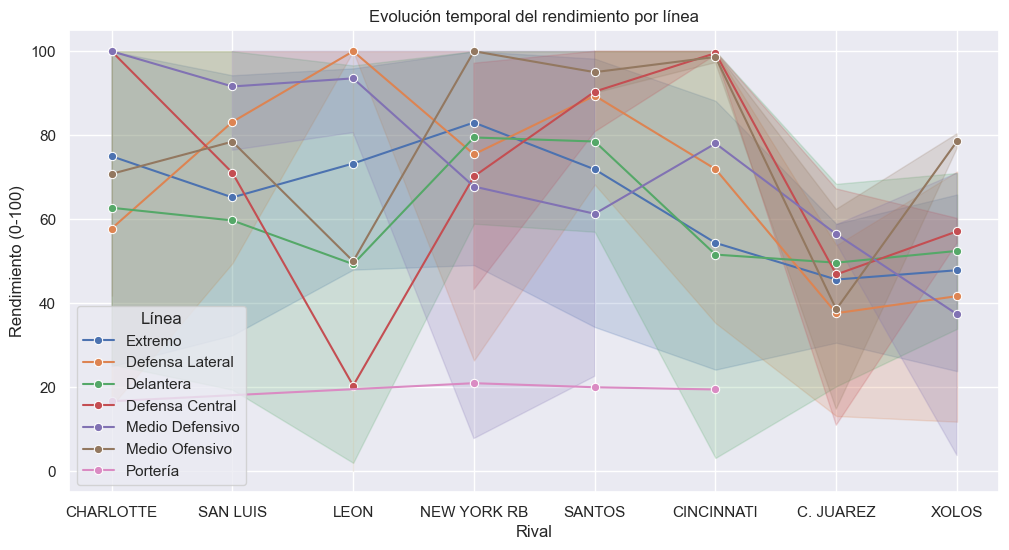

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_part, x="Rival", y="Rendimiento_Partido", hue="linea", marker="o")
plt.title("Evolución temporal del rendimiento por línea")
plt.ylabel("Rendimiento (0-100)")
plt.xlabel("Rival")
plt.legend(title="Línea")
plt.show()


In [16]:
# ===== Preparación / sanity checks =====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encontrar columna de nombre de jugador
col_nombre = None
for c in ["nombre", "Nombre", "jugador", "Jugador"]:
    if c in df_part.columns:
        col_nombre = c
        break
if col_nombre is None:
    raise ValueError("No encuentro columna de nombre de jugador (nombre/Nombre/jugador/Jugador).")

# Tipos y orden
if "Fecha" in df_part.columns:
    df_part["Fecha"] = pd.to_datetime(df_part["Fecha"], errors="coerce")
df_part = df_part.sort_values(["id_jugador", "Fecha"], kind="mergesort")

# Local/Visitante normalizado
if "local_visitante" in df_part.columns:
    df_part["local_visitante"] = df_part["local_visitante"].str.strip().str.lower().map({
        "l": "Local", "local": "Local",
        "v": "Visitante", "visitante": "Visitante",
    }).fillna(df_part["local_visitante"])

# RvE continuo (si no existe numérico)
if "Rendimiento_vs_Entreno" in df_part.columns:
    df_part["RvE_pct"] = pd.to_numeric(df_part["Rendimiento_vs_Entreno"], errors="coerce")
else:
    # fallback si viene como RvE
    if "RvE" in df_part.columns:
        df_part["RvE_pct"] = pd.to_numeric(df_part["RvE"], errors="coerce")
    else:
        df_part["RvE_pct"] = np.nan

# Flag categórico consistente
if "RvE_flag" not in df_part.columns:
    def _cat_rve(x):
        if pd.isna(x): return "Sin base"
        if x >= 250:   return "Alto (≥250%)"
        if x >= 150:   return "Moderado (150–249%)"
        return "OK (<150%)"
    df_part["RvE_flag"] = df_part["RvE_pct"].apply(_cat_rve)

# Carpeta de export
export_dir = "exports_partidos"
os.makedirs(export_dir, exist_ok=True)

# Paletas y estilos
sns.set(style="whitegrid", context="notebook")


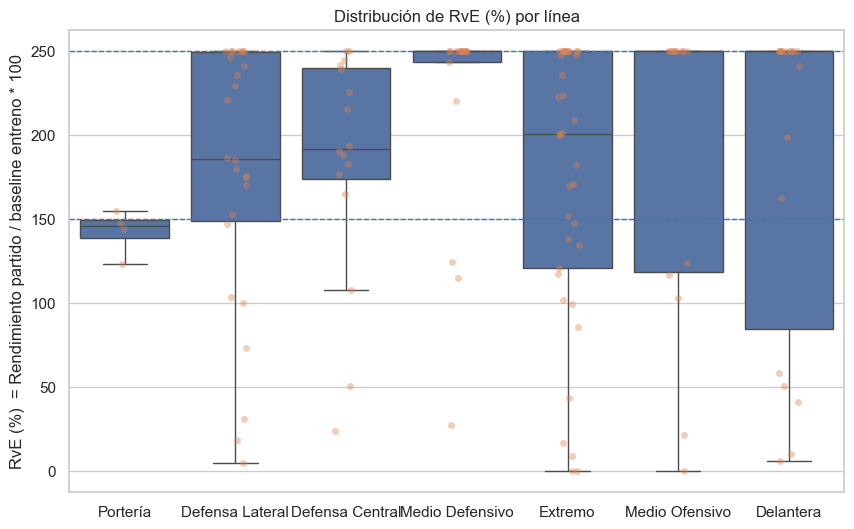

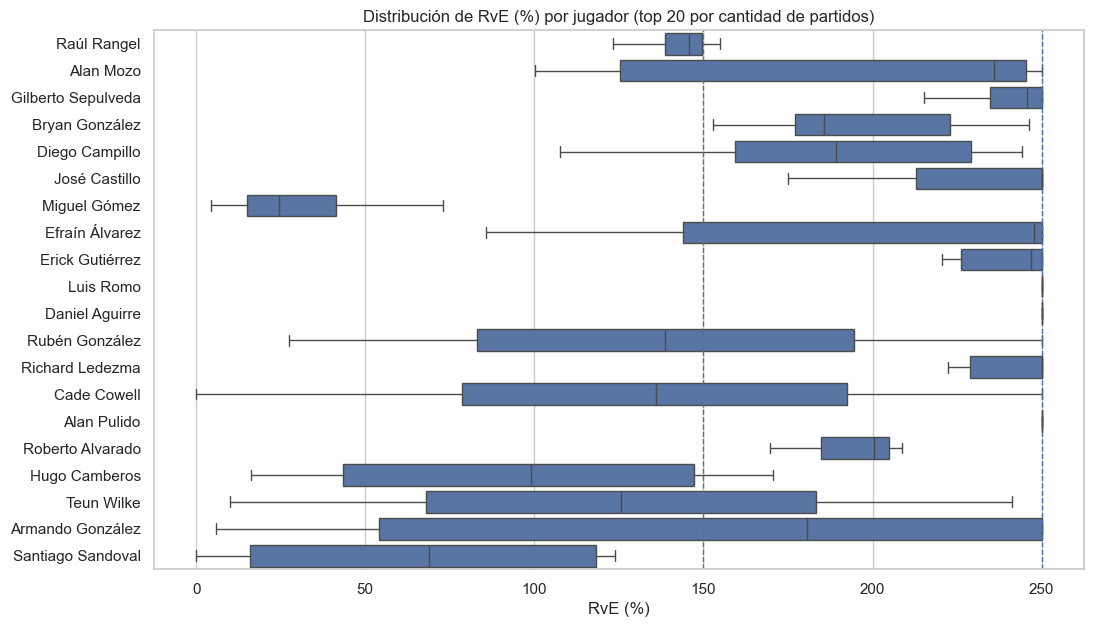

In [17]:
# ===== Distribución RvE por línea =====
plt.figure(figsize=(10,6))
sns.boxplot(data=df_part, x="linea", y="RvE_pct", showfliers=False)
sns.stripplot(data=df_part, x="linea", y="RvE_pct", alpha=0.4, dodge=True)
plt.axhline(150, linestyle="--", linewidth=1)
plt.axhline(250, linestyle="--", linewidth=1)
plt.title("Distribución de RvE (%) por línea")
plt.ylabel("RvE (%)  = Rendimiento partido / baseline entreno * 100")
plt.xlabel("")
plt.show()

# ===== Distribución RvE por jugador (top N por cantidad de partidos) =====
top_n = 20
cnt = df_part.groupby([col_nombre])["RvE_pct"].count().sort_values(ascending=False).head(top_n).index
plt.figure(figsize=(12, max(6, 0.35*len(cnt))))
sns.boxplot(data=df_part[df_part[col_nombre].isin(cnt)], y=col_nombre, x="RvE_pct", showfliers=False)
plt.axvline(150, linestyle="--", linewidth=1)
plt.axvline(250, linestyle="--", linewidth=1)
plt.title(f"Distribución de RvE (%) por jugador (top {top_n} por cantidad de partidos)")
plt.xlabel("RvE (%)")
plt.ylabel("")
plt.show()


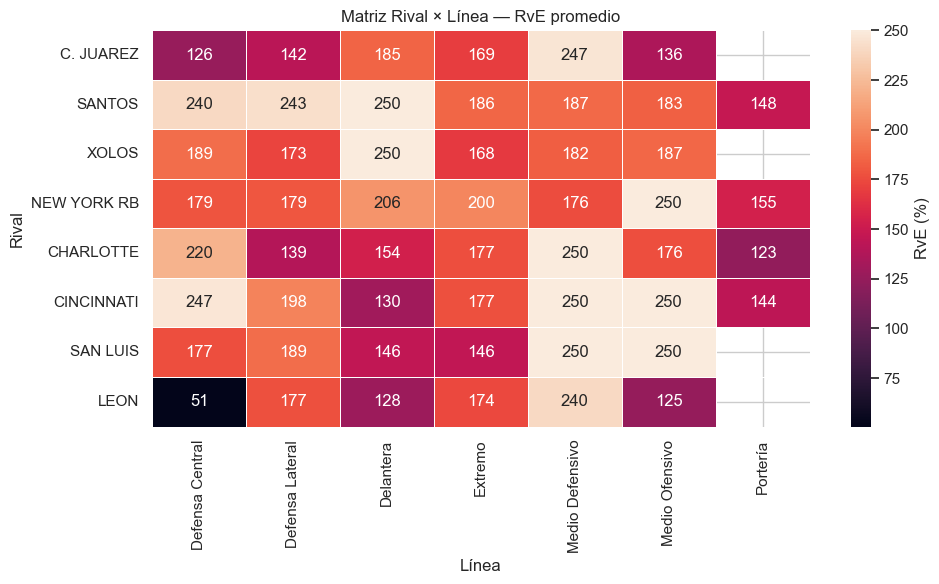

,Rival,linea,RvE_pct,n
0,C. JUAREZ,Defensa Central,125.614396,3
1,C. JUAREZ,Defensa Lateral,142.184771,4
2,C. JUAREZ,Delantera,184.984913,4
3,C. JUAREZ,Extremo,169.373993,6
4,C. JUAREZ,Medio Defensivo,246.736072,2
5,C. JUAREZ,Medio Ofensivo,135.524203,2
6,CHARLOTTE,Defensa Central,220.422346,2
7,CHARLOTTE,Defensa Lateral,138.753131,4
8,CHARLOTTE,Delantera,154.149883,2
9,CHARLOTTE,Extremo,176.581397,4


In [18]:
# Ordenar rivales por frecuencia
riv_freq = df_part["Rival"].value_counts().index.tolist()
pivot_rve = (df_part
             .groupby(["Rival", "linea"], as_index=False)["RvE_pct"]
             .mean())
pivot_cnt = (df_part
             .groupby(["Rival", "linea"], as_index=False)["RvE_pct"]
             .size()
             .rename(columns={"size": "n"}))

heat = pivot_rve.pivot_table(index="Rival", columns="linea", values="RvE_pct")
heat = heat.reindex(riv_freq)  # por frecuencia

plt.figure(figsize=(10, max(6, 0.4*len(heat))))
sns.heatmap(heat, annot=True, fmt=".0f", linewidths=.5, cbar_kws={"label": "RvE (%)"})
plt.title("Matriz Rival × Línea — RvE promedio")
plt.xlabel("Línea")
plt.ylabel("Rival")
plt.tight_layout()
plt.show()

# Export tabla con conteos también
tbl_rival = (pivot_rve.merge(pivot_cnt, on=["Rival","linea"], how="left")
             .sort_values(["Rival","linea"]))
tbl_rival.to_csv(f"{export_dir}/rival_linea_rve_promedio_conteo.csv", index=False)
tbl_rival.head(10)


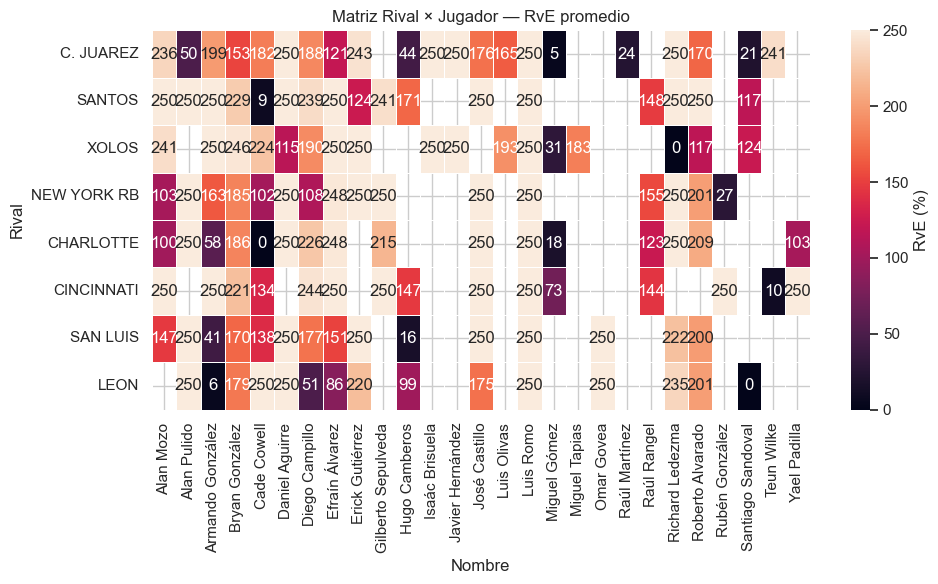

,Rival,nombre,RvE_pct,n
0,C. JUAREZ,Alan Mozo,235.767299,1
1,C. JUAREZ,Alan Pulido,50.347430,1
2,C. JUAREZ,Armando González,198.506730,1
3,C. JUAREZ,Bryan González,152.924200,1
4,C. JUAREZ,Cade Cowell,181.973775,1
5,C. JUAREZ,Daniel Aguirre,250.000000,1
6,C. JUAREZ,Diego Campillo,188.048293,1
7,C. JUAREZ,Efraín Álvarez,120.996797,1
8,C. JUAREZ,Erick Gutiérrez,243.472143,1
9,C. JUAREZ,Hugo Camberos,43.540466,1


In [19]:
# Ordenar rivales por frecuencia
riv_freq = df_part["Rival"].value_counts().index.tolist()
pivot_rve = (df_part
             .groupby(["Rival", "nombre"], as_index=False)["RvE_pct"]
             .mean())
pivot_cnt = (df_part
             .groupby(["Rival", "nombre"], as_index=False)["RvE_pct"]
             .size()
             .rename(columns={"size": "n"}))

heat = pivot_rve.pivot_table(index="Rival", columns="nombre", values="RvE_pct")
heat = heat.reindex(riv_freq)  # por frecuencia

plt.figure(figsize=(10, max(6, 0.4*len(heat))))
sns.heatmap(heat, annot=True, fmt=".0f", linewidths=.5, cbar_kws={"label": "RvE (%)"})
plt.title("Matriz Rival × Jugador — RvE promedio")
plt.xlabel("Nombre")
plt.ylabel("Rival")
plt.tight_layout()
plt.show()

# Export tabla con conteos también
tbl_rival = (pivot_rve.merge(pivot_cnt, on=["Rival","nombre"], how="left")
             .sort_values(["Rival","nombre"]))
tbl_rival.to_csv(f"{export_dir}/rival_linea_rve_promedio_conteo.csv", index=False)
tbl_rival.head(10)

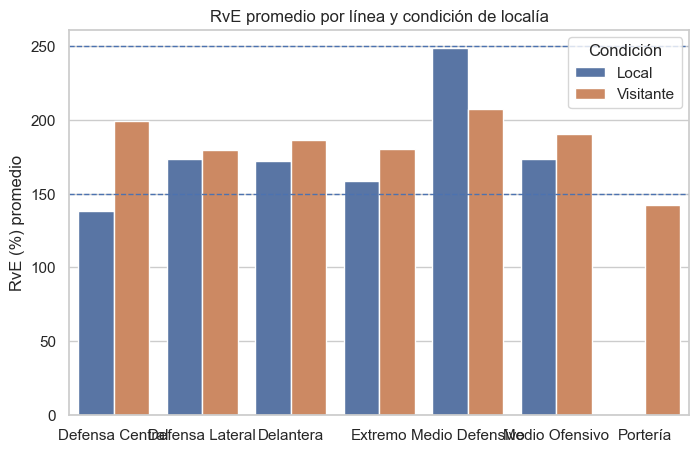

,Local_Visitante,RvE_prom
0,Local,175.106219
1,Visitante,186.253879


In [20]:
# Promedios por Local/Visitante y línea
lv_linea = (df_part
            .dropna(subset=["Local_Visitante"])
            .groupby(["Local_Visitante", "linea"], as_index=False)["RvE_pct"]
            .mean()
            .rename(columns={"RvE_pct":"RvE_prom"}))

plt.figure(figsize=(8,5))
sns.barplot(data=lv_linea, x="linea", y="RvE_prom", hue="Local_Visitante")
plt.axhline(150, linestyle="--", linewidth=1)
plt.axhline(250, linestyle="--", linewidth=1)
plt.title("RvE promedio por línea y condición de localía")
plt.ylabel("RvE (%) promedio")
plt.xlabel("")
plt.legend(title="Condición")
plt.show()

# Global
lv_global = (df_part
             .dropna(subset=["Local_Visitante"])
             .groupby("Local_Visitante", as_index=False)["RvE_pct"]
             .mean()
             .rename(columns={"RvE_pct":"RvE_prom"}))
lv_global.to_csv(f"{export_dir}/local_visitante_global.csv", index=False)
lv_global


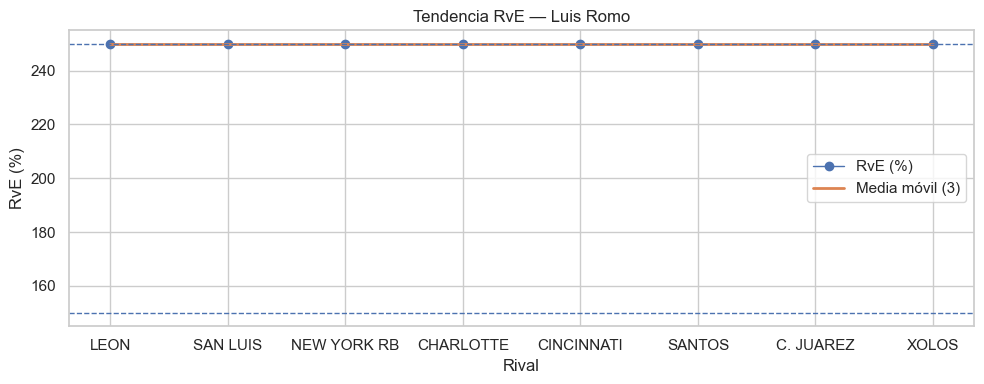

,id_jugador,Fecha,Rival,Local_Visitante,RvE_pct,nombre,tipo
11,4,2025-07-26,SAN LUIS,Local,147.181606,Alan Mozo,Bottom
10,4,2025-07-31,NEW YORK RB,Visitante,103.215798,Alan Mozo,Bottom
9,4,2025-08-03,CHARLOTTE,Visitante,100.054504,Alan Mozo,Bottom
6,4,2025-08-07,CINCINNATI,Visitante,250.000000,Alan Mozo,Top
7,4,2025-08-10,SANTOS,Local,250.000000,Alan Mozo,Top
8,4,2025-08-22,XOLOS,Visitante,240.891562,Alan Mozo,Top
102,23,2025-07-19,LEON,Visitante,250.000000,Alan Pulido,Bottom
103,23,2025-07-26,SAN LUIS,Local,250.000000,Alan Pulido,Bottom
101,23,2025-08-16,C. JUAREZ,Local,50.347430,Alan Pulido,Bottom
98,23,2025-07-19,LEON,Visitante,250.000000,Alan Pulido,Top


In [21]:
# Rolling por jugador (suaviza ruido partido a partido)
win = 3  # partidos
df_part["_rve_roll"] = (df_part
                        .sort_values(["id_jugador","Fecha"])
                        .groupby("id_jugador")["RvE_pct"]
                        .transform(lambda s: s.rolling(win, min_periods=1).mean()))

# Gráfico para un jugador específico (cambiá el nombre)
jugador_demo = df_part[col_nombre].value_counts().index[0]
tmp = df_part[df_part[col_nombre]==jugador_demo]

plt.figure(figsize=(10,4))
plt.plot(tmp["Rival"], tmp["RvE_pct"], marker="o", linewidth=1, label="RvE (%)")
plt.plot(tmp["Rival"], tmp["_rve_roll"], linewidth=2, label=f"Media móvil ({win})")
plt.axhline(150, linestyle="--", linewidth=1)
plt.axhline(250, linestyle="--", linewidth=1)
plt.title(f"Tendencia RvE — {jugador_demo}")
plt.ylabel("RvE (%)")
plt.xlabel("Rival")
plt.legend()
plt.tight_layout()
plt.show()

# Top / Bottom partidos (por jugador)
def top_bottom_por_jugador(df, k=3):
    rows = []
    for jid, g in df.groupby("id_jugador"):
        nombre = g[col_nombre].iloc[0]
        gb = g.dropna(subset=["RvE_pct"]).copy()
        if gb.empty: 
            continue
        tb_top = gb.nlargest(k, "RvE_pct")[["Fecha","Rival","Local_Visitante","RvE_pct", col_nombre]]
        tb_top["tipo"] = "Top"
        tb_bot = gb.nsmallest(k, "RvE_pct")[["Fecha","Rival","Local_Visitante","RvE_pct", col_nombre]]
        tb_bot["tipo"] = "Bottom"
        out = pd.concat([tb_top, tb_bot], ignore_index=True)
        out.insert(0, "id_jugador", jid)
        rows.append(out)
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

tb = top_bottom_por_jugador(df_part, k=3)
tb = tb.sort_values([col_nombre, "tipo", "RvE_pct"], ascending=[True, True, False])
tb.to_csv(f"{export_dir}/top_bottom_rve_por_jugador.csv", index=False)
tb.head(12)


In [22]:
# Conteo de flags por jugador
flags_jugador = (df_part
                 .groupby([col_nombre, "RvE_flag"], as_index=False)
                 .size()
                 .rename(columns={"size":"n"}))
pivot_flags_j = flags_jugador.pivot(index=col_nombre, columns="RvE_flag", values="n").fillna(0).astype(int)
pivot_flags_j["Total"] = pivot_flags_j.sum(axis=1)
pivot_flags_j = pivot_flags_j.sort_values("Total", ascending=False)
pivot_flags_j.to_csv(f"{export_dir}/resumen_flags_por_jugador.csv")
pivot_flags_j.head(10)

# Conteo de flags por línea
flags_linea = (df_part
               .groupby(["linea", "RvE_flag"], as_index=False)
               .size()
               .rename(columns={"size":"n"}))
pivot_flags_l = flags_linea.pivot(index="linea", columns="RvE_flag", values="n").fillna(0).astype(int)
pivot_flags_l["Total"] = pivot_flags_l.sum(axis=1)
pivot_flags_l.to_csv(f"{export_dir}/resumen_flags_por_linea.csv")
pivot_flags_l


RvE_flag,<50% (muy por debajo),Normal,Total
linea,,,
Defensa Central,1,15,16
Defensa Lateral,3,23,26
Delantera,3,15,18
Extremo,5,32,37
Medio Defensivo,1,16,17
Medio Ofensivo,2,12,14
Portería,0,4,4


In [23]:
# Partidos con RvE muy alto o muy bajo (posibles issues de baseline o cargas)
thr_high = 300
thr_low  = 50

outliers = df_part.loc[(df_part["RvE_pct"]>=thr_high) | (df_part["RvE_pct"]<=thr_low),
                       ["Fecha", col_nombre, "linea", "Rival", "Local_Visitante", "RvE_pct", "Rendimiento_Partido"]].copy()
outliers = outliers.sort_values("RvE_pct", ascending=False)
outliers.to_csv(f"{export_dir}/partidos_outliers_rve.csv", index=False)
outliers.head(15)


,Fecha,nombre,linea,Rival,Local_Visitante,RvE_pct,Rendimiento_Partido
104,2025-08-16,Hugo Camberos,Extremo,C. JUAREZ,Local,43.540466,15.000000
17,2025-07-26,Armando González,Delantera,SAN LUIS,Local,41.221073,19.426370
99,2025-08-22,Miguel Gómez,Defensa Lateral,XOLOS,Visitante,30.695682,11.803747
88,2025-07-31,Rubén González,Medio Defensivo,NEW YORK RB,Visitante,27.496113,7.779231
130,2025-08-16,Raúl Martínez,Defensa Central,C. JUAREZ,Local,23.941922,10.956138
96,2025-08-16,Santiago Sandoval,Medio Ofensivo,C. JUAREZ,Local,21.048405,14.788795
81,2025-08-03,Miguel Gómez,Defensa Lateral,CHARLOTTE,Visitante,18.476550,5.552303
61,2025-07-26,Hugo Camberos,Extremo,SAN LUIS,Local,16.257320,6.430394
91,2025-08-07,Teun Wilke,Delantera,CINCINNATI,Visitante,10.128653,3.168765
32,2025-08-10,Cade Cowell,Extremo,SANTOS,Visitante,8.516063,1.773823


In [24]:
# KPIs por jugador: promedio RvE, % partidos ≥150, ≥250, partidos, y promedio Rendimiento_Partido
def kpis_jugador(df):
    g = df.groupby("id_jugador", as_index=False).agg(
        partidos=("RvE_pct", "count"),
        rve_prom=("RvE_pct", "mean"),
        rve_p90=("RvE_pct", lambda s: np.nanpercentile(s.dropna(), 90) if s.notna().any() else np.nan),
        rve_ge150=("RvE_pct", lambda s: (s>=150).mean() if s.notna().any() else np.nan),
        rve_ge250=("RvE_pct", lambda s: (s>=250).mean() if s.notna().any() else np.nan),
        rend_part_prom=("Rendimiento_Partido", "mean"),
    )
    # Nombre/posición/línea
    meta = df.groupby("id_jugador")[[col_nombre,  "linea"]].agg(lambda s: s.dropna().iloc[0] if s.dropna().any() else np.nan)
    meta = meta.reset_index()
    out = meta.merge(g, on="id_jugador", how="right")
    out["rve_ge150"] = (out["rve_ge150"]*100).round(1)
    out["rve_ge250"] = (out["rve_ge250"]*100).round(1)
    return out.sort_values(["rve_prom","rve_p90","partidos"], ascending=[False, False, False])

kpis = kpis_jugador(df_part)
kpis.to_csv(f"{export_dir}/kpis_partidos_por_jugador.csv", index=False)
kpis


,id_jugador,nombre,linea,partidos,rve_prom,rve_p90,rve_ge150,rve_ge250,rend_part_prom
14,18,Luis Romo,Medio Ofensivo,8,250.000000,250.000000,100.0,100.0,89.707213
10,14,Omar Govea,Medio Defensivo,2,250.000000,250.000000,100.0,100.0,89.517437
12,16,Isaác Brisuela,Extremo,2,250.000000,250.000000,100.0,100.0,66.979613
20,24,Javier Hernández,Delantera,2,250.000000,250.000000,100.0,100.0,50.749474
2,5,Gilberto Sepulveda,Defensa Central,4,239.090853,250.000000,100.0,50.0,94.262692
15,19,Daniel Aguirre,Medio Defensivo,7,230.659617,250.000000,85.7,85.7,76.979960
7,10,José Castillo,Defensa Lateral,7,228.654601,250.000000,100.0,71.4,85.604156
13,17,Erick Gutiérrez,Medio Defensivo,6,223.051532,250.000000,83.3,50.0,73.908215
19,23,Alan Pulido,Delantera,6,216.724572,250.000000,83.3,83.3,76.346539
17,21,Richard Ledezma,Extremo,7,208.240017,250.000000,85.7,57.1,78.278692
